In [51]:
from __future__ import absolute_import, division, print_function


import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

1.12.0


In [70]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

[0.         0.         0.         0.         0.         0.
 0.         0.         0.04705882 0.39215686 0.83137255 0.80392157
 0.7254902  0.70196078 0.67843137 0.72941176 0.75686275 0.86666667
 0.55686275 0.33333333 0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [53]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


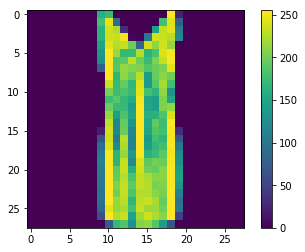

In [54]:
plt.figure()
plt.imshow(train_images[random.randint(0,60000)])
plt.colorbar()
plt.grid(False)
plt.show()

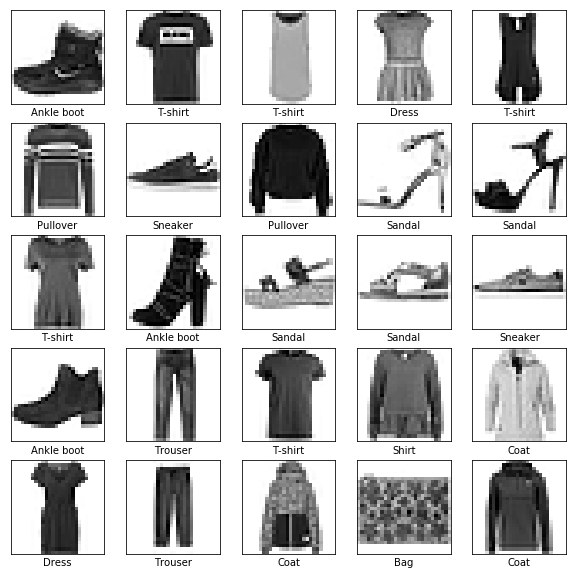

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [71]:
train_images = train_images/255
test_images = test_images/255

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [73]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.4982 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.3741 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.3374 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.3136 - acc: 0.8872
Epoch 5/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.2948 - acc: 0.8920


In [75]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 95us/step
Test accuracy: 0.8769


In [76]:
predictions = model.predict(test_images)

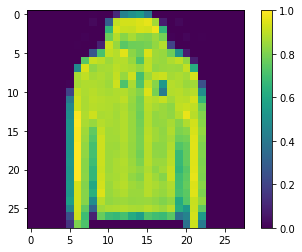

'Coat'

In [77]:
sample_image_num = random.randint(0,10000)
plt.figure()
plt.imshow(test_images[sample_image_num])
plt.colorbar()
plt.grid(False)
plt.show()
class_names[np.argmax(predictions[sample_image_num])]